In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [2]:
# Ensure the correct file path
data = pd.read_csv("/content/suv_data.csv")


In [3]:
X = data.iloc[:, [2, 3]].values  # Selecting 'Age' and 'EstimatedSalary'
y = data.iloc[:, 4].values       # 'Purchased' column

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [7]:
y_pred = classifier.predict(X_test)


In [8]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


Accuracy: 0.95

Confusion Matrix:
 [[31  1]
 [ 1  7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.88      0.88      0.88         8

    accuracy                           0.95        40
   macro avg       0.92      0.92      0.92        40
weighted avg       0.95      0.95      0.95        40



In [9]:
def plot_decision_boundary(X, y, classifier, title):
    """Plot the decision boundary for logistic regression"""
    X_min, X_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    Y_min, Y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(X_min, X_max, 0.01),
                         np.arange(Y_min, Y_max, 0.01))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
    plt.xlabel("Age")
    plt.ylabel("Estimated Salary")
    plt.title(title)
    plt.show()


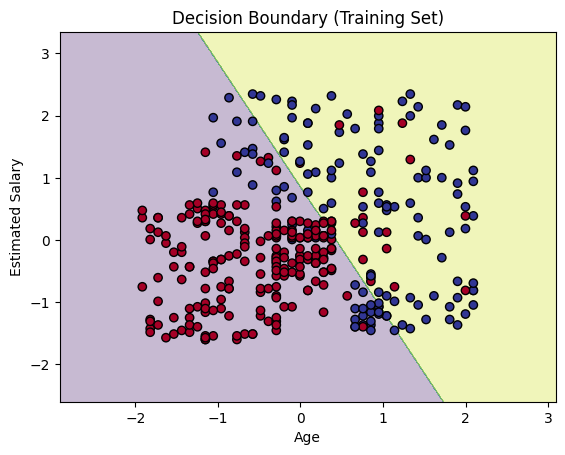

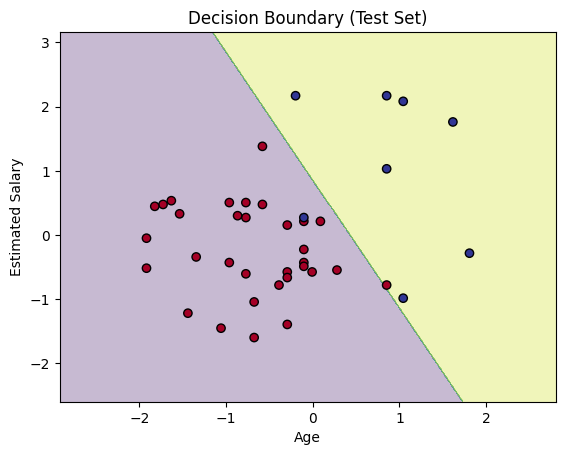

In [10]:
plot_decision_boundary(X_train, y_train, classifier, "Decision Boundary (Training Set)")
plot_decision_boundary(X_test, y_test, classifier, "Decision Boundary (Test Set)")
